In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def roll(gain, prob):
    if random.random() < prob:
        return gain - 1
    return -1

In [3]:
def roll_sequence(iteration_count, wager, gain, prob):
    base = 1
    for iteration in range(iteration_count):
        base += base*wager*roll(gain, prob)
    return base

In [21]:
def stoch_roll_sequence(iteration_count, wager, gains, probs):
    base = 1
    for iteration in range(iteration_count):
        gain = random.choice(gains)
        base += base*wager*roll(gain, probs[gain]/100)
    return base

In [4]:
def roll_samples(sample_count, iteration_count, wager, gain, prob):
    return np.array([roll_sequence(iteration_count, wager, gain, prob) for sample in range(sample_count)])

In [27]:
def stoch_roll_samples(sample_count, iteration_count, wager, gains, probs):
    return np.array([stoch_roll_sequence(iteration_count, wager, gains, probs) for sample in range(sample_count)])

In [38]:
 def min_prob(gain, min_gain):
    for prob in range(1, 101):
        samples = roll_samples(1000, 100, 1/100, gain, prob/100)
        if np.percentile(samples, 1) > min_gain:
            return prob

In [39]:
def generate_prob_profile(gains, min_gain):
    prob_profile = {}
    for gain in gains:
        prob_profile[gain] = min_prob(gain, min_gain)
    return prob_profile

In [40]:
prob_profile = generate_prob_profile(range(2,11), 2)
print(prob_profile)

{2: 92, 3: 67, 4: 54, 5: 45, 6: 39, 7: 35, 8: 32, 9: 30, 10: 28}


In [47]:
samples = stoch_roll_samples(1000, 100, 1/100, range(2, 11), prob_profile)
samples.sort()

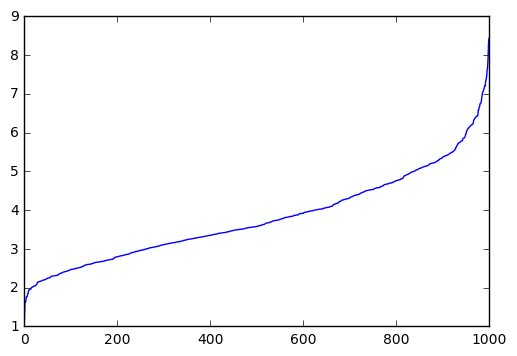

In [48]:
%matplotlib inline
plt.plot(samples)
plt.show()